In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [108]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mostly young people were aboard the titanic ship as the average age of people was 29

The average class of Passenger ticket was 2.3 meaning most people bought the 3rd class ticket , which we will see later how that affected their survivability 

The average cost of a ticket was 32 dollars and the highest was 512 dollars , as most had bought the 3rd class ticket which costs lesser than all other tickets, the average fare was less

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
#There is a total of 891 instances in the data set

In [112]:
#here we can see that age,cabin,embarked have missing values
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [113]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [114]:
#now we will fill the missing values in age with average(mean) age value
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

In [115]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [116]:
df['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [117]:
#as cabin is missing more than half its data , it is best to drop it
percentofnull=(df['Cabin'].isnull().sum()/len(df)*1.0)*100
percentofnull


77.10437710437711

In [118]:
#since 77% percent of data is missing , it would be better to drop the whole column
df.drop(columns="Cabin",inplace=True)

In [119]:
#As embarked is only missing two columns,it can filled in with the most recurring value
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
df["Embarked"].fillna(value="S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [121]:
emd=pd.DataFrame(df[["Embarked"]].groupby(by=["Embarked"]).size().reset_index())
emd.columns=["Embarked","Counts"]
emd.set_index("Embarked",inplace=True)
emd

,Counts
Embarked,
C,168
Q,77
S,644


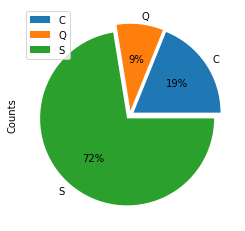

In [122]:
emd.plot(kind="pie",y="Counts",autopct="%1.0f%%",explode=(0.05,0.05,0.05))
plt.show()

C = Cherbourg, Q = Queenstown, S = Southampton

Here we can see that most of the people (72%) embarked from SouthHampton


---



In [123]:
svt=pd.DataFrame(df[["Survived"]].groupby(by="Survived").size().reset_index())
svt.columns=["Status","NumberOfPeople"]
svt["Status"]=np.where(svt["Status"]==0,"Not Survived","Survived")


,NumberOfPeople
Status,
Not Survived,549
Survived,342


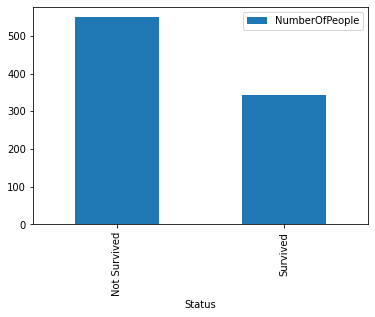

In [124]:
svt.plot(kind="bar",x="Status")
svt.set_index("Status")

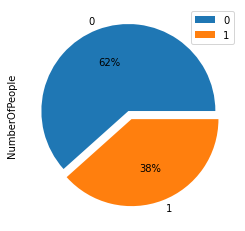

In [125]:
svt.plot(kind="pie",x="Status",y="NumberOfPeople",autopct="%1.0f%%",explode=(0.05,0.05))
plt.show()

This shows that 62% of people were not able to survive the tragedy while 38% were fortunate enough to have done the opposite

In [126]:
pff=pd.DataFrame(df[["Survived","Age"]])
survage=np.where(pff["Survived"]==1,pff["Age"],None)
notsurvage=np.where(pff["Survived"]==0,pff["Age"],None)
survage=pd.DataFrame(survage)
notsurvage=pd.DataFrame(notsurvage)


In [127]:
survage.dropna(inplace=True)
notsurvage.dropna(inplace=True)
survage.columns=["Age"]
survage.set_index("Age")

""
Age
38.0
26.0
35.0
27.0
14.0
...
15.0
56.0
25.0


In [128]:

notsurvage.columns=["Age"]
notsurvage.set_index("Age")

""
Age
22.000000
35.000000
29.699118
54.000000
2.000000
...
25.000000
39.000000
27.000000


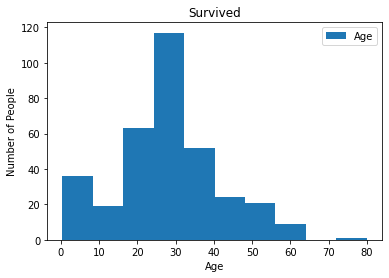

In [129]:
survage.plot(kind="hist")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Survived")
plt.show()

We can see that mostly young people (0-20) and (20-60) were able to survive the tragedy 

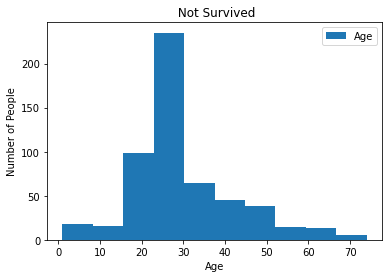

In [130]:
notsurvage.plot(kind="hist")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title(" Not Survived")
plt.show()

here we can see that the number of people from age group (0-20) to not have survived is less , while the people in age group(60-70) is more to not have survived than the previous graph 


In [131]:
pc=pd.DataFrame(df[["Survived","Pclass"]])
survclass=np.where(pc["Survived"]==1,pc["Pclass"],None)
notsurvclass=np.where(pc["Survived"]==0,pc["Pclass"],None)
survclass=pd.DataFrame(survclass)
notsurvclass=pd.DataFrame(notsurvclass)
survclass.dropna(inplace=True)
notsurvclass.dropna(inplace=True)
survclass.columns=["Class"]
survclass.set_index("Class")
notsurvclass.columns=["Class"]
notsurvclass.set_index("Class")

""
Class
3
3
3
1
3
...
3
3
2


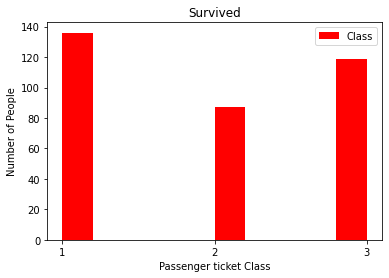

In [135]:
xt=[1,2,3]
survclass.plot(kind="hist",color="red")
plt.xlabel("Passenger ticket Class")
plt.ylabel("Number of People")
plt.title("Survived")
plt.xticks(np.arange(min(xt),max(xt)+1,1.0))
plt.show()

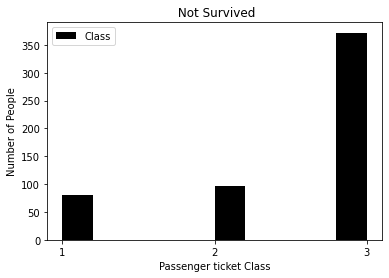

In [136]:

notsurvclass.plot(kind="hist",color="black",label=survclass["Class"].unique())
plt.xlabel("Passenger ticket Class")
plt.ylabel("Number of People")
plt.title(" Not Survived")
plt.xticks(np.arange(min(xt),max(xt)+1,1.0))
plt.show()

Here we can see that the ticket class mattered when it came to survivability as those with 3rd class ticket were the ones to have contributed the most to the "not survived " graph
